## Black friday dataset assignment lecture 15

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [378]:
df = pd.read_csv("black_friday.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [328]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

**convert Stay_In_Current_City_Years into int64**

In [385]:
df["Stay_In_Current_City_Years"].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [386]:
# using apply function to convert into numerical
def to_numeric(X):
    converter = str(X)
    if converter != "4+":
        return int(converter)
    elif converter == "4+":
        return 4
    
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].apply(to_numeric)
df["Stay_In_Current_City_Years"].value_counts()

1    193821
2    101838
3     95285
4     84726
0     74398
Name: Stay_In_Current_City_Years, dtype: int64

**Age column process**

In [387]:
df["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [388]:
# maximum age
df["Age"][1].split("-")[1]

'17'

In [389]:
def max_age(X):
    if X == "55+":
        return 55
    else:
        return int(X.split("-")[1])

df["Age"] = df["Age"].apply(max_age)

In [390]:
df["Age"].value_counts()

35    219587
45    110013
25     99660
55     60005
50     45701
17     15102
Name: Age, dtype: int64

**Product_Category_2 process**

In [391]:
df["Product_Category_2"].isnull().sum()

173638

In [392]:
# its a categorical numbers = missing 173,638 values from 550,068
df["Product_Category_2"].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [395]:
median = df["Product_Category_2"].median()
median

9.0

In [396]:
# cannot fill it with mean
df["Product_Category_2"].mean()

9.842329251122386

In [399]:
df.fillna(median, inplace = True)
df["Product_Category_2"].isnull().sum()

0

In [400]:
df["Product_Category_2"].value_counts()

9.0     179331
8.0      64088
14.0     55108
2.0      49217
16.0     43255
15.0     37855
5.0      26235
4.0      25677
6.0      16466
11.0     14134
17.0     13320
13.0     10531
12.0      5528
10.0      3043
3.0       2884
18.0      2770
7.0        626
Name: Product_Category_2, dtype: int64

**Product_Category_3 column process**

In [379]:
df["Product_Category_3"].isnull().sum()

383247

In [380]:
df["Product_Category_3"].median()

14.0

In [381]:
# categorical number
df["Product_Category_3"].value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

In [382]:
# fill it with sklearn
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")

df["Product_Category_3"] = imputer.fit_transform(df[["Product_Category_3"]])

In [383]:
df["Product_Category_3"].value_counts()

14.0    401675
16.0     32636
15.0     28013
17.0     16702
5.0      16658
8.0      12562
9.0      11579
12.0      9246
13.0      5459
6.0       4890
18.0      4629
4.0       1875
11.0      1805
10.0      1726
3.0        613
Name: Product_Category_3, dtype: int64

In [384]:
df["Product_Category_3"].isnull().sum()

0

## convert strings

In [344]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,17,10,A,2,0,3,NaN,14.0,8370
1,1000001,P00248942,F,17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,17,10,A,2,0,12,NaN,14.0,1422
3,1000001,P00085442,F,17,10,A,2,0,12,14.0,14.0,1057
4,1000002,P00285442,M,55,16,C,4,0,8,NaN,14.0,7969


In [401]:
df["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [402]:
df["Gender"] = pd.get_dummies(df["Gender"], drop_first=True)

In [403]:
df["City_Category"].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

**Does City_Category make sense to our taregets or not? shoud we converted!?** 

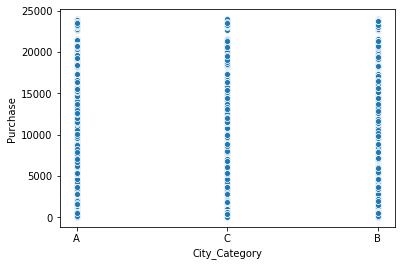

In [348]:
sns.scatterplot(df["City_Category"], df["Purchase"]) # doen`t make any sense

In [404]:
df = pd.get_dummies(df, columns = ["City_Category"], drop_first=True)

## apply boxplot

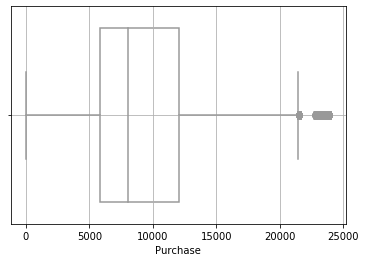

In [349]:
sns.boxplot(df["Purchase"], color='w')
plt.grid(True) # lets get its indexes

In [350]:
from datasist.structdata import detect_outliers

indexes = detect_outliers(df, 0, df["Purchase"].to_frame())
len(indexes) # 2677 outliers

2677

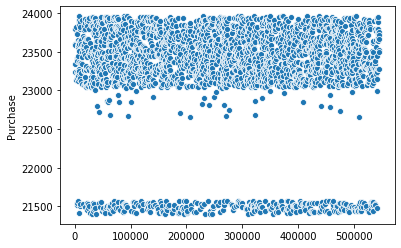

In [351]:
sns.scatterplot(x = indexes, y = df.iloc[indexes]["Purchase"])

In [405]:
df["Purchase"].median()

8047.0

**Delete outliers or fill it!**

In [411]:
# fillung outliers
for single_col in df.columns:
    outlier_indexes = detect_outliers(df, 0, df["Purchase"].to_frame())
    df[single_col].iloc[outlier_indexes] = df["Purchase"].median()

**Outlier solved**

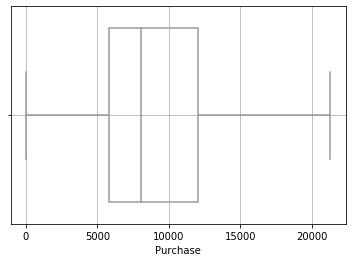

In [412]:
sns.boxplot(df["Purchase"], color='w')
plt.grid(True) # lets get its indexes

In [365]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_A,City_Category_B,City_Category_C
0,1000001.0,P00069042,0.0,17.0,10.0,2.0,0.0,3.0,NaN,14.0,8370.0,1.0,0.0,0.0
1,1000001.0,P00248942,0.0,17.0,10.0,2.0,0.0,1.0,6.0,14.0,15200.0,1.0,0.0,0.0
2,1000001.0,P00087842,0.0,17.0,10.0,2.0,0.0,12.0,NaN,14.0,1422.0,1.0,0.0,0.0
3,1000001.0,P00085442,0.0,17.0,10.0,2.0,0.0,12.0,14.0,14.0,1057.0,1.0,0.0,0.0
4,1000002.0,P00285442,1.0,55.0,16.0,4.0,0.0,8.0,NaN,14.0,7969.0,0.0,0.0,1.0


## drop uncessary columns

In [415]:
df.drop(columns = ["User_ID", "Product_ID"], inplace=True)

## get cleaned DataFrame and prepare it for ML

In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  float64
 1   Age                         550068 non-null  float64
 2   Occupation                  550068 non-null  float64
 3   Stay_In_Current_City_Years  550068 non-null  float64
 4   Marital_Status              550068 non-null  float64
 5   Product_Category_1          550068 non-null  float64
 6   Product_Category_2          550068 non-null  float64
 7   Product_Category_3          550068 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   City_Category_B             550068 non-null  float64
 10  City_Category_C             550068 non-null  float64
dtypes: float64(11)
memory usage: 46.2 MB


In [435]:
X = df.drop("Purchase", axis=1)
y = df["Purchase"]

print(X.shape)
print(y.shape)

(550068, 10)
(550068,)


In [432]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [433]:
print("X training", X_train.shape)
print("y training", y_train.shape)

X training (495061, 10)
y training (495061,)
